In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
import random
import scipy
import ast

In [2]:
with open('stats.txt') as t:
    stats = t.read()

In [3]:
stats = ast.literal_eval(stats)

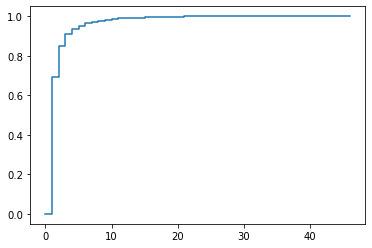

In [4]:
q_seq, p_seq = stats['degree_cdf']
plt.plot(
        np.append(np.repeat(q_seq, 2)[1:], q_seq[-1]), 
        np.repeat(p_seq, 2)
    )
plt.show()

In [5]:
n_nodes = stats['number_nodes']
r = stats['radius']
d = stats['diameter']
avg_clustering = stats['average_clustering']
avg_path_len = stats['average_path_length']
n_cc = stats['number_cc']
deg_cdf = stats['degree_cdf']
stats

{'number_nodes': 1882,
 'radius': [15, 2],
 'diameter': [28, 4],
 'average_clustering': [0.005066798238955518, 0.001],
 'average_path_length': [11.748410823170731, 2],
 'number_cc': [168, 32],
 'degree_cdf': [[0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   19,
   21,
   24,
   46],
  [0.0,
   0.6902231668437833,
   0.8517534537725824,
   0.9086078639744952,
   0.9378320935175345,
   0.9516471838469713,
   0.9654622741764081,
   0.9723698193411264,
   0.9776833156216791,
   0.9808714133900106,
   0.9845908607863975,
   0.9888416578108395,
   0.9893730074388948,
   0.9925611052072264,
   0.9936238044633369,
   0.9952178533475027,
   0.9957492029755579,
   0.9968119022316685,
   0.997874601487779,
   0.9989373007438895,
   0.9994686503719448,
   1.0]]}

In [6]:
nodes = [i for i in range(1882)]
edges = []
for i in range(1882):
    for j in range(i+1, 1882):
        edge = np.random.binomial(1, 0.001)
        if edge==1:
            edges.append(tuple((nodes[i], nodes[j])))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
connected_c = nx.connected_components(G)

In [7]:
max_connected_c = list(max(list(connected_c)))

In [8]:
edges = []
for i in max_connected_c:
    for j in G.edges(i):
        edges.append(j)
subG = nx.Graph()
subG.add_edges_from(edges)

In [9]:
nx.number_of_nodes(subG)

1378

In [10]:
nx.radius(subG)

16

In [11]:
nx.diameter(subG)

30

In [12]:
nx.average_clustering(subG)

0.0

In [13]:
nx.average_shortest_path_length(subG)

11.076042974304166

In [14]:
nx.number_connected_components(subG)

1

In [15]:
degrees = dict(G.degree)
zero_deg = []
for i in degrees:
    if degrees[i] == 0:
        zero_deg.append(i)

In [16]:
zero_deg_1 = zero_deg[:len(zero_deg)//2]
zero_deg_2 = zero_deg[len(zero_deg)//2:len(zero_deg)//2+len(zero_deg_1)]
if len(zero_deg_1) != len(zero_deg_2):
    zero_deg = zip(zero_deg_1.extend(max_connected_c[0]), zero_deg_2)
else:
    zero_deg = zip(zero_deg_1, zero_deg_2)
G.add_edges_from(zero_deg)

In [17]:
node_degrees = []
for i in G.nodes:
    node_degrees.append(G.edges(i))

In [18]:
nodes_1 = sorted(node_degrees, key=len, reverse=True)[100]
nodes_2 = sorted(node_degrees, key=len, reverse=True)[110]
GG = nx.Graph()
GG.add_edges_from(nodes_1)
GG.add_edges_from(nodes_2)

In [19]:
last_G = nx.complete_graph(GG.nodes)
G.add_edges_from(last_G.edges)

In [20]:
nx.number_connected_components(G)

222

In [21]:
nx.average_clustering(G)

0.004253132627202765

In [22]:
nx.number_of_nodes(G)

1882

In [23]:
with open('results.txt', 'w') as f:
    lines = []
    for i in G.edges:
        lines.append(str(i[0])+' '+str(i[1])+'\n')
    f.writelines(lines)